# Info

Plot the results of 2D oscillator.

In [1]:
import sys
sys.path.append("../../")

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel as C
from core import GaussianProcessRegressor, custom_KDE, GaussianInputs, log_pdf, generate_plotdata, compute_tf_cost, TFkernel
from examples.oscillator.oscillator import f_h, f_l
from scipy.interpolate import interp1d
from joblib import Parallel, delayed
from scipy.interpolate import InterpolatedUnivariateSpline

In [3]:
plt.rcParams.update({'font.size': 14})

# Plot error

In [4]:
#single_fidelity results
sgp = np.load('data/sgp.npy', allow_pickle=True)
errors = np.array([i[1] for i in sgp])
errors = np.asarray(errors, float)

In [5]:
DATAPATH = 'data/amp01/'
postfix = '_amp01.npy'

In [6]:
# load the raw bi-fidelity results 
fixed_1= np.load(DATAPATH + 'fix_1' + postfix, allow_pickle=True)
fixed_2 = np.load(DATAPATH + 'fix_2' + postfix, allow_pickle=True)
fixed_5 = np.load(DATAPATH + 'fix_5' + postfix, allow_pickle=True)
fixed_10 = np.load(DATAPATH + 'fix_10' + postfix, allow_pickle=True)
fixed_15 = np.load(DATAPATH + 'fix_15' + postfix, allow_pickle=True)
opt = np.load(DATAPATH + 'opt_5' + postfix, allow_pickle=True)

In [7]:
# generate plot data
fixed_1_plot = generate_plotdata(fixed_1, 5, fixed_quato=True)
fixed_2_plot = generate_plotdata(fixed_2, 5, fixed_quato=True)
fixed_5_plot = generate_plotdata(fixed_5, 5, fixed_quato=True)
fixed_10_plot = generate_plotdata(fixed_10, 5, fixed_quato=True)
fixed_15_plot = generate_plotdata(fixed_15, 5, fixed_quato=True)
opt_plot = generate_plotdata(opt, 5, fixed_quato=False)

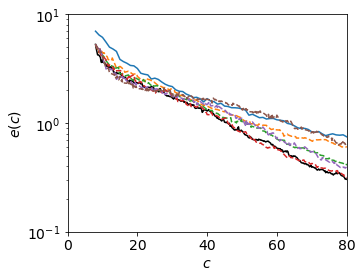

In [8]:
# plot the results 
plt.figure(figsize=(5,4))
plt.plot(8 + np.arange(73), np.median(errors, axis=0), label ='SF')
plt.plot(opt_plot[0], np.median(opt_plot[1], axis=0), color='black', label ='MF-O')
plt.plot(fixed_1_plot[0], np.median(fixed_1_plot[1], axis=0), '--', label ='MF_F1')
plt.plot(fixed_2_plot[0], np.median(fixed_2_plot[1], axis=0), '--', label ='MF_F2')
plt.plot(fixed_5_plot[0], np.median(fixed_5_plot[1], axis=0), '--', label ='MF_F5')
plt.plot(fixed_10_plot[0], np.median(fixed_10_plot[1], axis=0), '--', label ='MF_F10')
plt.plot(fixed_15_plot[0], np.median(fixed_15_plot[1], axis=0), '--', label ='MF_F15')
plt.xlim(0,80)
plt.yscale('log')
plt.ylim(10**-1,10**1)
plt.xlabel('$c$')
plt.ylabel('$e(c)$')
plt.show()